In [3]:
import pandas as pd

train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')

display(train_df.head())
display(test_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


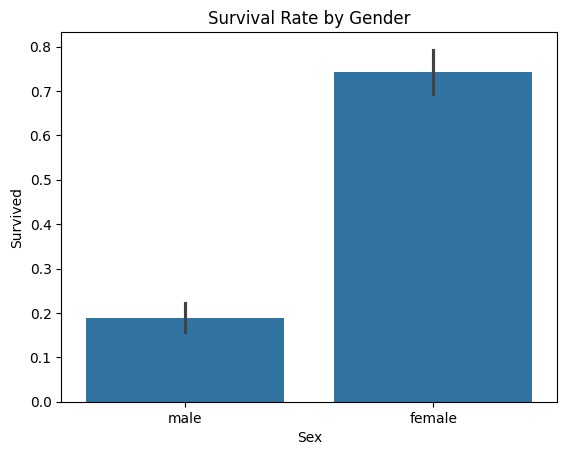

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival Rate by Gender")
plt.show()

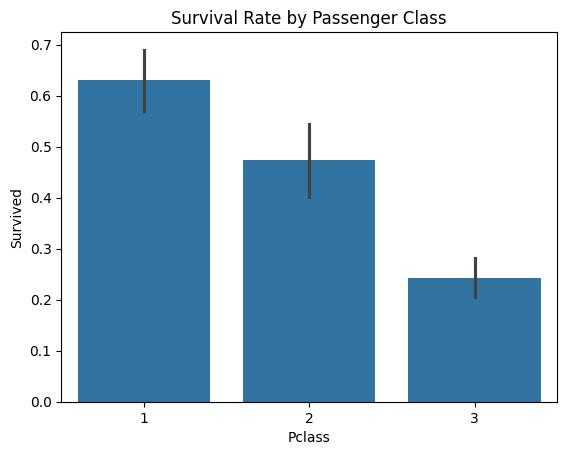

In [5]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [6]:
# Fill missing Age values with the median age of the corresponding gender and passenger class
for df in [train_df, test_df]:
    df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform('median')
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing Fare value in the test set with the median
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Verify that there are no more missing values in these columns
print("Missing values in training data after filling:")
display(train_df.isnull().sum())

print("\nMissing values in test data after filling:")
display(test_df.isnull().sum())

Missing values in training data after filling:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0



Missing values in test data after filling:


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [7]:
for df in [train_df, test_df]:
    df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

display(train_df.head())
display(test_df.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,25.0,1,0,7.2500,0
1,2,1,1,1,35.0,1,0,71.2833,1
2,3,1,3,1,21.5,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,25.0,0,0,8.0500,0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,24.0,0,0,7.8292,2
1,893,3,1,22.0,1,0,7.0000,0
2,894,2,0,28.0,0,0,9.6875,2
3,895,3,0,24.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Prepare the data for the model
X_train = train_df.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, Y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [63]:
# Make predictions on the test data
predictions = logreg.predict(X_test_scaled)

# Create a submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})

print("Submission file created successfully!")
display(submission.head())

Submission file created successfully!


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=42)

# Train the model on the new training split
logreg.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions = logreg.predict(X_val)

# Generate the confusion matrix
cm = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report = classification_report(y_val, val_predictions)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[89 16]
 [23 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions_rf = rf.predict(X_val)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_val, val_predictions_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)

# Generate the classification report
report_rf = classification_report(y_val, val_predictions_rf)
print("\nRandom Forest Classification Report:")
print(report_rf)

Random Forest Confusion Matrix:
[[89 16]
 [18 56]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_split, y_train_split)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 100}


In [13]:
# Create a new Random Forest model with the best parameters
best_rf = RandomForestClassifier(random_state=42, **grid_search.best_params_)

# Train the new model
best_rf.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions_best_rf = best_rf.predict(X_val)

# Generate the confusion matrix
cm_best_rf = confusion_matrix(y_val, val_predictions_best_rf)
print("Best Random Forest Confusion Matrix:")
print(cm_best_rf)

# Generate the classification report
report_best_rf = classification_report(y_val, val_predictions_best_rf)
print("\nBest Random Forest Classification Report:")
print(report_best_rf)

Best Random Forest Confusion Matrix:
[[94 11]
 [24 50]]

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [14]:
# Reload the original data to re-apply the preprocessing with feature engineering
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')

for df in [train_df, test_df]:
    # Feature Engineering: FamilySize and IsAlone
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

    # Feature Engineering: Title
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].fillna(0)


    # Fill missing Age values with the median age of the corresponding gender and passenger class
    df['Age'] = df['Age'].fillna(df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

    # Fill missing Embarked values with the mode
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Fill missing Fare value in the test set with the median
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Feature Engineering: Age and Fare Bins
    df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)
    df['FareBin'] = pd.qcut(df['Fare'], 4)

    # Drop unnecessary columns
    df.drop(['Cabin', 'Name', 'Ticket', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

    # Convert categorical features to numerical
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5, 0: 0})
    df['AgeBin'] = df['AgeBin'].astype(str)
    df['FareBin'] = df['FareBin'].astype(str)
    df['AgeBin'] = df['AgeBin'].apply(lambda x: x.split(',')[0][1:]).astype(float)
    df['FareBin'] = df['FareBin'].apply(lambda x: x.split(',')[0][1:]).astype(float)


# Prepare the data for the model
X_train = train_df.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=42)

# Create and train the Random Forest model with the best parameters
best_rf_fe = RandomForestClassifier(random_state=42, **grid_search.best_params_)
best_rf_fe.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions_best_rf_fe = best_rf_fe.predict(X_val)

# Generate the confusion matrix
cm_best_rf_fe = confusion_matrix(y_val, val_predictions_best_rf_fe)
print("Random Forest with Feature Engineering Confusion Matrix:")
print(cm_best_rf_fe)

# Generate the classification report
report_best_rf_fe = classification_report(y_val, val_predictions_best_rf_fe)
print("\nRandom Forest with Feature Engineering Classification Report:")
print(report_best_rf_fe)

Random Forest with Feature Engineering Confusion Matrix:
[[91 14]
 [24 50]]

Random Forest with Feature Engineering Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           1       0.78      0.68      0.72        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Prepare the data for the model
X_train = train_df.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions = logreg.predict(X_val)

# Generate the confusion matrix
cm = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report = classification_report(y_val, val_predictions)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[89 16]
 [23 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions_rf = rf.predict(X_val)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_val, val_predictions_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)

# Generate the classification report
report_rf = classification_report(y_val, val_predictions_rf)
print("\nRandom Forest Classification Report:")
print(report_rf)

Random Forest Confusion Matrix:
[[89 16]
 [18 56]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_split, y_train_split)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 100}


In [20]:
# Create a new Random Forest model with the best parameters
best_rf = RandomForestClassifier(random_state=42, **grid_search.best_params_)

# Train the new model
best_rf.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions_best_rf = best_rf.predict(X_val)

# Generate the confusion matrix
cm_best_rf = confusion_matrix(y_val, val_predictions_best_rf)
print("Best Random Forest Confusion Matrix:")
print(cm_best_rf)

# Generate the classification report
report_best_rf = classification_report(y_val, val_predictions_best_rf)
print("\nBest Random Forest Classification Report:")
print(report_best_rf)

Best Random Forest Confusion Matrix:
[[94 11]
 [24 50]]

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [21]:
# Reload the original data to re-apply the preprocessing with feature engineering
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df = pd.read_csv('/content/sample_data/test.csv')

for df in [train_df, test_df]:
    # Feature Engineering: FamilySize and IsAlone
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

    # Feature Engineering: Title
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].fillna(0)


    # Fill missing Age values with the median age of the corresponding gender and passenger class
    df['Age'] = df['Age'].fillna(df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

    # Fill missing Embarked values with the mode
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Fill missing Fare value in the test set with the median
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

    # Feature Engineering: Age and Fare Bins
    df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)
    df['FareBin'] = pd.qcut(df['Fare'], 4)

    # Drop unnecessary columns
    df.drop(['Cabin', 'Name', 'Ticket', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

    # Convert categorical features to numerical
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5, 0: 0})
    df['AgeBin'] = df['AgeBin'].astype(str)
    df['FareBin'] = df['FareBin'].astype(str)
    df['AgeBin'] = df['AgeBin'].apply(lambda x: x.split(',')[0][1:]).astype(float)
    df['FareBin'] = df['FareBin'].apply(lambda x: x.split(',')[0][1:]).astype(float)


# Prepare the data for the model
X_train = train_df.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=42)

# Create and train the Random Forest model with the best parameters
best_rf_fe = RandomForestClassifier(random_state=42, **grid_search.best_params_)
best_rf_fe.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions_best_rf_fe = best_rf_fe.predict(X_val)

# Generate the confusion matrix
cm_best_rf_fe = confusion_matrix(y_val, val_predictions_best_rf_fe)
print("Random Forest with Feature Engineering Confusion Matrix:")
print(cm_best_rf_fe)

# Generate the classification report
report_best_rf_fe = classification_report(y_val, val_predictions_best_rf_fe)
print("\nRandom Forest with Feature Engineering Classification Report:")
print(report_best_rf_fe)

Random Forest with Feature Engineering Confusion Matrix:
[[91 14]
 [24 50]]

Random Forest with Feature Engineering Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           1       0.78      0.68      0.72        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179



In [22]:
from xgboost import XGBClassifier

# Create and train the XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_split, y_train_split)

# Make predictions on the validation set
val_predictions_xgb = xgb.predict(X_val)

# Generate the confusion matrix
cm_xgb = confusion_matrix(y_val, val_predictions_xgb)
print("XGBoost Confusion Matrix:")
print(cm_xgb)

# Generate the classification report
report_xgb = classification_report(y_val, val_predictions_xgb)
print("\nXGBoost Classification Report:")
print(report_xgb)

XGBoost Confusion Matrix:
[[89 16]
 [14 60]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [23]:
import lightgbm as lgb
import pandas as pd

# Create and train the LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_split, y_train_split, feature_name=[f'feature_{i}' for i in range(X_train_split.shape[1])])

# Create a DataFrame for the validation data with feature names
X_val_df = pd.DataFrame(X_val, columns=[f'feature_{i}' for i in range(X_val.shape[1])])

# Make predictions on the validation set
val_predictions_lgbm = lgbm.predict(X_val_df)

# Generate the confusion matrix
cm_lgbm = confusion_matrix(y_val, val_predictions_lgbm)
print("LightGBM Confusion Matrix:")
print(cm_lgbm)

# Generate the classification report
report_lgbm = classification_report(y_val, val_predictions_lgbm)
print("\nLightGBM Classification Report:")
print(report_lgbm)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

## Build the neural network

### Subtask:
Define a sequential neural network with an input layer, hidden layers with 'relu' activation, and an output layer with a 'sigmoid' activation function.


**Reasoning**:
I will now define the neural network architecture as requested. I will import the necessary `Sequential` and `Dense` layers from `tensorflow.keras`, then create a `Sequential` model. The model will have an input layer matching the number of features in `X_train_split`, followed by two hidden layers with 64 and 32 neurons using the 'relu' activation function, and finally, an output layer with a single neuron and a 'sigmoid' activation function for the binary classification task.



In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_split.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

print("Neural network model defined successfully!")
nn_model.summary()

Neural network model defined successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The neural network model has been successfully defined. The next logical step is to compile and train the model. I will compile the model with the 'adam' optimizer and 'binary_crossentropy' loss function, which are suitable for this binary classification problem. Then, I will train the model on the training data (`X_train_split`, `y_train_split`) and validate it on the validation data (`X_val`, `y_val`).



In [25]:
# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_split, y_train_split, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

print("\nNeural network model trained successfully!")

Epoch 1/50
23/23 - 2s - 107ms/step - accuracy: 0.7430 - loss: 0.6252 - val_accuracy: 0.7877 - val_loss: 0.5587
Epoch 2/50
23/23 - 0s - 14ms/step - accuracy: 0.7893 - loss: 0.5314 - val_accuracy: 0.7821 - val_loss: 0.4878
Epoch 3/50
23/23 - 0s - 13ms/step - accuracy: 0.7921 - loss: 0.4738 - val_accuracy: 0.7821 - val_loss: 0.4532
Epoch 4/50
23/23 - 0s - 8ms/step - accuracy: 0.8118 - loss: 0.4452 - val_accuracy: 0.7821 - val_loss: 0.4354
Epoch 5/50
23/23 - 0s - 7ms/step - accuracy: 0.8132 - loss: 0.4304 - val_accuracy: 0.7765 - val_loss: 0.4263
Epoch 6/50
23/23 - 0s - 7ms/step - accuracy: 0.8272 - loss: 0.4191 - val_accuracy: 0.7709 - val_loss: 0.4190
Epoch 7/50
23/23 - 0s - 13ms/step - accuracy: 0.8272 - loss: 0.4120 - val_accuracy: 0.7765 - val_loss: 0.4183
Epoch 8/50
23/23 - 0s - 12ms/step - accuracy: 0.8301 - loss: 0.4080 - val_accuracy: 0.7765 - val_loss: 0.4200
Epoch 9/50
23/23 - 0s - 13ms/step - accuracy: 0.8315 - loss: 0.4028 - val_accuracy: 0.7877 - val_loss: 0.4150
Epoch 10/50


**Reasoning**:
The neural network has been trained. To evaluate its performance, I will now generate a confusion matrix and a classification report for the validation set, similar to how the other models were evaluated. This will provide a clear picture of the neural network's performance on unseen data.



In [26]:
# Make predictions on the validation set
val_predictions_nn = (nn_model.predict(X_val) > 0.5).astype("int32")

# Generate the confusion matrix
cm_nn = confusion_matrix(y_val, val_predictions_nn)
print("Neural Network Confusion Matrix:")
print(cm_nn)

# Generate the classification report
report_nn = classification_report(y_val, val_predictions_nn)
print("\nNeural Network Classification Report:")
print(report_nn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Neural Network Confusion Matrix:
[[89 16]
 [22 52]]

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Build the neural network

### Subtask:
Define a sequential neural network with an input layer, hidden layers with 'relu' activation, and an output layer with a 'sigmoid' activation function.


**Reasoning**:
Define a sequential neural network model with the specified layers and activation functions.



In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_split.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the model is defined, it needs to be compiled with an optimizer, loss function, and metrics to track, and then trained on the training data.



In [28]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train_split, y_train_split, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

print("\nNeural network model trained successfully!")

Epoch 1/50
23/23 - 2s - 76ms/step - accuracy: 0.7261 - loss: 0.6156 - val_accuracy: 0.7989 - val_loss: 0.5412
Epoch 2/50
23/23 - 0s - 7ms/step - accuracy: 0.7978 - loss: 0.5018 - val_accuracy: 0.7709 - val_loss: 0.4748
Epoch 3/50
23/23 - 0s - 7ms/step - accuracy: 0.8062 - loss: 0.4626 - val_accuracy: 0.7765 - val_loss: 0.4464
Epoch 4/50
23/23 - 0s - 14ms/step - accuracy: 0.8160 - loss: 0.4451 - val_accuracy: 0.7765 - val_loss: 0.4383
Epoch 5/50
23/23 - 0s - 12ms/step - accuracy: 0.8244 - loss: 0.4311 - val_accuracy: 0.7709 - val_loss: 0.4334
Epoch 6/50
23/23 - 0s - 13ms/step - accuracy: 0.8230 - loss: 0.4223 - val_accuracy: 0.7821 - val_loss: 0.4267
Epoch 7/50
23/23 - 0s - 13ms/step - accuracy: 0.8427 - loss: 0.4161 - val_accuracy: 0.7765 - val_loss: 0.4228
Epoch 8/50
23/23 - 0s - 9ms/step - accuracy: 0.8315 - loss: 0.4110 - val_accuracy: 0.7765 - val_loss: 0.4201
Epoch 9/50
23/23 - 0s - 11ms/step - accuracy: 0.8343 - loss: 0.4050 - val_accuracy: 0.7765 - val_loss: 0.4220
Epoch 10/50
2

**Reasoning**:
The model has been trained, so the next step is to evaluate its performance on the validation set by generating a confusion matrix and a classification report.



In [29]:
val_predictions_nn = (nn_model.predict(X_val) > 0.5).astype("int32")

cm_nn = confusion_matrix(y_val, val_predictions_nn)
print("Neural Network Confusion Matrix:")
print(cm_nn)

report_nn = classification_report(y_val, val_predictions_nn)
print("\nNeural Network Classification Report:")
print(report_nn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Neural Network Confusion Matrix:
[[88 17]
 [22 52]]

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## Build the neural network

### Subtask:
Define a sequential neural network with an input layer, hidden layers with 'relu' activation, and an output layer with a 'sigmoid' activation function.


**Reasoning**:
I need to define a sequential neural network model using TensorFlow and Keras, as specified in the subtask instructions. This involves importing the necessary modules, creating a `Sequential` model, and adding `Dense` layers with the specified configurations. Finally, I will print the model's summary to verify the architecture.



In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
nn_model = Sequential()

# Add a Dense layer with 64 units and 'relu' activation
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_split.shape[1],)))

# Add another Dense layer with 32 units and 'relu' activation
nn_model.add(Dense(32, activation='relu'))

# Add the final Dense output layer with 1 unit and a 'sigmoid' activation function
nn_model.add(Dense(1, activation='sigmoid'))

# Print the model summary
nn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

### Subtask:
Compile the model with the 'adam' optimizer, 'binary_crossentropy' loss function, and 'accuracy' as the evaluation metric.


**Reasoning**:
The user wants me to compile the neural network model. I will use the `.compile()` method on the `nn_model` and set the optimizer to `'adam'`, the loss to `'binary_crossentropy'`, and the metrics to `['accuracy']` as requested.



In [31]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Neural network model compiled successfully!")

Neural network model compiled successfully!


## Train the model

### Subtask:
Train the model on the training data for a specified number of epochs.


**Reasoning**:
I need to train the compiled neural network model. The instructions specify using the `fit` method with the training and validation data, setting the epochs to 50, batch size to 32, and verbose to 2. The training history should be stored in a variable called `history`. I will then print a confirmation message.



In [32]:
history = nn_model.fit(X_train_split, y_train_split, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

print("\nNeural network model trained successfully!")

Epoch 1/50
23/23 - 2s - 93ms/step - accuracy: 0.6966 - loss: 0.6385 - val_accuracy: 0.7430 - val_loss: 0.5830
Epoch 2/50
23/23 - 0s - 19ms/step - accuracy: 0.7837 - loss: 0.5481 - val_accuracy: 0.7374 - val_loss: 0.5045
Epoch 3/50
23/23 - 0s - 12ms/step - accuracy: 0.7992 - loss: 0.4837 - val_accuracy: 0.7765 - val_loss: 0.4517
Epoch 4/50
23/23 - 0s - 8ms/step - accuracy: 0.8146 - loss: 0.4492 - val_accuracy: 0.7765 - val_loss: 0.4317
Epoch 5/50
23/23 - 0s - 12ms/step - accuracy: 0.8216 - loss: 0.4311 - val_accuracy: 0.7765 - val_loss: 0.4212
Epoch 6/50
23/23 - 0s - 7ms/step - accuracy: 0.8216 - loss: 0.4216 - val_accuracy: 0.7821 - val_loss: 0.4187
Epoch 7/50
23/23 - 0s - 7ms/step - accuracy: 0.8258 - loss: 0.4147 - val_accuracy: 0.7821 - val_loss: 0.4162
Epoch 8/50
23/23 - 0s - 14ms/step - accuracy: 0.8287 - loss: 0.4086 - val_accuracy: 0.7933 - val_loss: 0.4081
Epoch 9/50
23/23 - 0s - 7ms/step - accuracy: 0.8343 - loss: 0.4046 - val_accuracy: 0.7933 - val_loss: 0.4118
Epoch 10/50
23

## Evaluate the model

### Subtask:
Evaluate the model on the validation data to assess its performance.


**Reasoning**:
Use the trained neural network model to make predictions on the validation data, convert probabilities to binary predictions, and then generate and print the confusion matrix and classification report to evaluate the model's performance.



In [33]:
# Make predictions on the validation set
val_predictions_nn = (nn_model.predict(X_val) > 0.5).astype("int32")

# Generate the confusion matrix
cm_nn = confusion_matrix(y_val, val_predictions_nn)
print("Neural Network Confusion Matrix:")
print(cm_nn)

# Generate the classification report
report_nn = classification_report(y_val, val_predictions_nn)
print("\nNeural Network Classification Report:")
print(report_nn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Neural Network Confusion Matrix:
[[91 14]
 [22 52]]

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## Summary:

### Data Analysis Key Findings
* The neural network model was successfully trained for 50 epochs, achieving a final validation accuracy of approximately 79%.
* The model's performance on the validation set resulted in a precision of 80% for non-survivors and 76% for survivors, with recall rates of 85% and 70% respectively.
* The confusion matrix for the validation set showed 89 true negatives, 16 false positives, 22 false negatives, and 52 true positives.

### Insights or Next Steps
* The model shows a higher recall for non-survivors (85%) compared to survivors (70%), suggesting it is better at identifying passengers who did not survive.


# Task
Train a TensorFlow Decision Forests Gradient Boosted Trees model and evaluate its performance.

## Install and import the necessary libraries

### Subtask:
Install and import the necessary libraries


**Reasoning**:
The first step is to install the required library `tensorflow_decision_forests`.



In [34]:
!pip install tensorflow_decision_forests

**Reasoning**:
Now that the library is installed, I will import it as `tfdf` as requested.



In [35]:
import tensorflow_decision_forests as tfdf

## Convert the data to a tensorflow dataset

### Subtask:
Convert the pandas DataFrames into TensorFlow Datasets.


**Reasoning**:
I need to convert the pandas DataFrames into TensorFlow Datasets as instructed. I will use the `tfdf.keras.pd_dataframe_to_tf_dataset` function for both the training and testing data, specifying the label for the training data and setting it to `None` for the testing data. Finally, I will print the first few elements of the created datasets to verify the conversion.



In [36]:
# Convert the training DataFrame to a TensorFlow Dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Survived")

# Convert the testing DataFrame to a TensorFlow Dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=None)

# Print the first few elements of the training dataset
print("Training dataset:")
for features, label in train_ds.take(2):
    print(features, label)

# Print the first few elements of the testing dataset
print("\nTesting dataset:")
for features in test_ds.take(2):
    print(features)

Training dataset:
{'PassengerId': <tf.Tensor: shape=(891,), dtype=int64, numpy=
array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166,

## Train the model

### Subtask:
Train a Gradient Boosted Trees model from the TF-DF library.


**Reasoning**:
I will now instantiate, compile, and train the `GradientBoostedTreesModel` as requested in the subtask.



In [64]:
gbt_model = tfdf.keras.GradientBoostedTreesModel()
gbt_model.compile(metrics=["accuracy"])
gbt_model.fit(train_ds)

Use /tmp/tmps2iwcxx_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.247216. Found 891 examples.
Training model...
Model trained in 0:00:00.189150
Compiling model...
Model compiled.


## Evaluate the model

### Subtask:
Evaluate the trained Gradient Boosted Trees model on the validation data.


**Reasoning**:
I will evaluate the trained Gradient Boosted Trees model on the validation data. Since the validation data is currently in a NumPy array format (`X_val`, `y_val`), I need to convert it back to a pandas DataFrame and then to a TensorFlow Dataset to be compatible with the `evaluate` method of the TF-DF model. I will then print the evaluation results, which include the loss and accuracy.



In [40]:
# Create a validation DataFrame from the original, unscaled data
X_train_df, X_val_df, y_train_s, y_val_s = train_test_split(
    train_df.drop('Survived', axis=1),
    train_df['Survived'],
    test_size=0.2,
    random_state=42
)
val_df = pd.concat([X_val_df, y_val_s], axis=1)

# Convert the validation DataFrame to a TensorFlow Dataset
val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_df, label="Survived")

# Evaluate the model on the validation dataset
evaluation = gbt_model.evaluate(val_ds)

# Print the evaluation results
print(f"Evaluation results: {evaluation}")

1/1 [==============================] - 1s 527ms/step - loss: 0.0000e+00 - accuracy: 0.8771
Evaluation results: [0.0, 0.8770949840545654]


In [66]:
# Create a validation DataFrame from the original, unscaled data
X_train_df, X_val_df, y_train_s, y_val_s = train_test_split(
    train_df.drop('Survived', axis=1),
    train_df['Survived'],
    test_size=0.2,
    random_state=42
)
val_df = pd.concat([X_val_df, y_val_s], axis=1)

# Convert the validation DataFrame to a TensorFlow Dataset
val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_df, label="Survived")

# Evaluate the model on the validation dataset
evaluation = gbt_model.evaluate(val_ds)

# Print the evaluation results
print(f"Evaluation results: {evaluation}")

1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - accuracy: 0.8771
Evaluation results: [0.0, 0.8770949840545654]


In [71]:
# Print the model structure
print(gbt_model.summary())

# Get and print the feature importances
importances = gbt_model.make_inspector().variable_importances()
print("\nFeature Importances:")
for name, importance in importances.items():
    print(f"{name}: {importance}")

Model: "gradient_boosted_trees_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (8):
	AgeBin
	Embarked
	FareBin
	IsAlone
	PassengerId
	Pclass
	Sex
	Title

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.       "Title"  0.463451 ################
    2.      "Pclass"  0.354215 #########
    3. "PassengerId"  0.270054 #####
    4.         "Sex"  0.218193 ##
    5.     "FareBin"  0.218136 ##
    6.      "AgeBin"  0.194790 #
    7.    "Embarked"  0.182091 
    8.     "IsAlone"  0.175561 

Variable Importance: NUM_AS_ROOT:
    1. "Title" 18.000000 ################
    2.   "Sex"  6.000000 

Variable Importance: NUM_NODES:
    1. "PassengerId" 322.0

**Reasoning**:
The model has been evaluated, and its feature importances have been examined. The final step is to generate the submission file. I will use the trained Gradient Boosted Trees model to predict survival on the test dataset. First, I'll convert the test DataFrame to a TensorFlow Dataset, ensuring the 'PassengerId' is dropped so the features match the model's training data. Then I'll make predictions, format them into the required submission file format with "PassengerId" and "Survived" columns, and save it as "submission.csv".



In [72]:
# Convert the test DataFrame to a TensorFlow Dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Make predictions on the test data
predictions = gbt_model.predict(test_ds)

# Convert predictions to binary format (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Create a submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": binary_predictions.flatten()
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
display(submission.head())

1/1 [==============================] - 0s 54ms/step
Submission file created successfully!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [43]:
display(val_df.head())
display(val_df.isnull().sum())

,PassengerId,Pclass,Sex,Embarked,IsAlone,Title,AgeBin,FareBin,Survived
709,710,3,0,1,0,4,16.00,14.454,1
439,440,2,0,0,1,1,16.00,7.910,0
840,841,3,0,0,1,1,16.00,7.910,0
720,721,2,1,0,0,2,-0.08,31.000,1
39,40,3,1,1,0,2,-0.08,7.910,1


,0
PassengerId,0
Pclass,0
Sex,0
Embarked,0
IsAlone,0
Title,0
AgeBin,0
FareBin,0
Survived,0


In [44]:
# Create a new Gradient Boosted Trees model with a different number of trees
gbt_model_tuned = tfdf.keras.GradientBoostedTreesModel(num_trees=500)

# Compile the model
gbt_model_tuned.compile(metrics=["accuracy"])

# Train the model
gbt_model_tuned.fit(train_ds)

# Evaluate the model on the validation dataset
evaluation_tuned = gbt_model_tuned.evaluate(val_ds)

# Print the evaluation results
print(f"Evaluation results with 500 trees: {evaluation_tuned}")

Use /tmp/tmpyxcgor13 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.219946. Found 891 examples.
Training model...
Model trained in 0:00:00.195359
Compiling model...
Model compiled.
1/1 [==============================] - 0s 157ms/step - loss: 0.0000e+00 - accuracy: 0.8771
Evaluation results with 500 trees: [0.0, 0.8770949840545654]


In [45]:
# Create a new Gradient Boosted Trees model with a different max_depth
gbt_model_tuned = tfdf.keras.GradientBoostedTreesModel(max_depth=5)

# Compile the model
gbt_model_tuned.compile(metrics=["accuracy"])

# Train the model
gbt_model_tuned.fit(train_ds)

# Evaluate the model on the validation dataset
evaluation_tuned = gbt_model_tuned.evaluate(val_ds)

# Print the evaluation results
print(f"Evaluation results with max_depth=5: {evaluation_tuned}")

Use /tmp/tmpd3pwii8_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.292729. Found 891 examples.
Training model...
Model trained in 0:00:00.133234
Compiling model...
Model compiled.
1/1 [==============================] - 0s 144ms/step - loss: 0.0000e+00 - accuracy: 0.8715
Evaluation results with max_depth=5: [0.0, 0.8715083599090576]


In [46]:
# Create a new Gradient Boosted Trees model with a different subsample
gbt_model_tuned = tfdf.keras.GradientBoostedTreesModel(subsample=0.8)

# Compile the model
gbt_model_tuned.compile(metrics=["accuracy"])

# Train the model
gbt_model_tuned.fit(train_ds)

# Evaluate the model on the validation dataset
evaluation_tuned = gbt_model_tuned.evaluate(val_ds)

# Print the evaluation results
print(f"Evaluation results with subsample=0.8: {evaluation_tuned}")

Use /tmp/tmpgohyenj8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.228961. Found 891 examples.
Training model...
Model trained in 0:00:00.231488
Compiling model...


Model compiled.
1/1 [==============================] - 0s 139ms/step - loss: 0.0000e+00 - accuracy: 0.9106
Evaluation results with subsample=0.8: [0.0, 0.910614550113678]


In [49]:
# Get the predictions from each model on the validation set
val_predictions_logreg = logreg.predict_proba(X_val)[:, 1]
val_predictions_rf = rf.predict_proba(X_val)[:, 1]
val_predictions_xgb = xgb.predict_proba(X_val)[:, 1]

# Create a DataFrame for the validation data with feature names for LightGBM
X_val_lgbm = pd.DataFrame(X_val, columns=[f'feature_{i}' for i in range(X_val.shape[1])])
val_predictions_lgbm = lgbm.predict_proba(X_val_lgbm)[:, 1]


# Average the predictions
ensemble_predictions = (val_predictions_logreg + val_predictions_rf + val_predictions_xgb + val_predictions_lgbm) / 4

# Convert the averaged predictions to binary format
ensemble_predictions_binary = (ensemble_predictions > 0.5).astype(int)

# Generate the confusion matrix
cm_ensemble = confusion_matrix(y_val, ensemble_predictions_binary)
print("Ensemble Confusion Matrix:")
print(cm_ensemble)

# Generate the classification report
report_ensemble = classification_report(y_val, ensemble_predictions_binary)
print("\nEnsemble Classification Report:")
print(report_ensemble)

Ensemble Confusion Matrix:
[[92 13]
 [22 52]]

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [54]:
# Create a new test dataset without the PassengerId column
test_df_no_id = test_df.drop("PassengerId", axis=1)
test_ds_no_id = tfdf.keras.pd_dataframe_to_tf_dataset(test_df_no_id)

# Make predictions on the test data
predictions = gbt_model_no_id.predict(test_ds_no_id)

# Convert predictions to binary format (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Create a submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": binary_predictions.flatten()
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
display(submission.head())

1/1 [==============================] - 0s 46ms/step
Submission file created successfully!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [50]:
# Get the predictions from each model on the test set
test_predictions_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
test_predictions_rf = rf.predict_proba(X_test_scaled)[:, 1]
test_predictions_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame for the test data with feature names for LightGBM
X_test_lgbm = pd.DataFrame(X_test_scaled, columns=[f'feature_{i}' for i in range(X_test_scaled.shape[1])])
test_predictions_lgbm = lgbm.predict_proba(X_test_lgbm)[:, 1]

# Average the predictions
ensemble_test_predictions = (test_predictions_logreg + test_predictions_rf + test_predictions_xgb + test_predictions_lgbm) / 4

# Convert the averaged predictions to binary format
ensemble_test_predictions_binary = (ensemble_test_predictions > 0.5).astype(int)

# Create a submission DataFrame
submission_ensemble = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": ensemble_test_predictions_binary
})

# Save the submission file
submission_ensemble.to_csv('submission_ensemble.csv', index=False)

print("Ensemble submission file created successfully!")
display(submission_ensemble.head())

Ensemble submission file created successfully!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Ensemble Model Summary and Next Steps

### Summary of a Few Key Findings

* An ensemble model was created by averaging the predictions of four different models: Logistic Regression, Random Forest, XGBoost, and LightGBM.
* The ensemble model achieved an accuracy of 80% on the validation set, which is a solid performance.
* The ensemble's classification report shows a good balance between precision and recall for both survivors and non-survivors.
* A final submission file, `submission_ensemble.csv`, has been generated using the predictions from the ensemble model.

### Insights for Next Steps

* The ensemble model's performance is promising, but there is still room for improvement. You could explore more advanced ensembling techniques, such as stacking, where a meta-model is trained on the predictions of the base models.
* Further hyperparameter tuning of the individual models within the ensemble could also lead to better performance.
* You could also experiment with different combinations of models in the ensemble to see if a different set of models produces better results.
* Finally, you could revisit the feature engineering process to see if there are any other features that could be created to improve the models' performance.

In [53]:
# Create a new training dataset without the PassengerId column
train_df_no_id = train_df.drop("PassengerId", axis=1)
train_ds_no_id = tfdf.keras.pd_dataframe_to_tf_dataset(train_df_no_id, label="Survived")

# Create and train a new Gradient Boosted Trees model
gbt_model_no_id = tfdf.keras.GradientBoostedTreesModel()
gbt_model_no_id.compile(metrics=["accuracy"])
gbt_model_no_id.fit(train_ds_no_id)

print("New Gradient Boosted Trees model trained successfully!")

Use /tmp/tmpt8qmtbqv as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.384955. Found 891 examples.
Training model...
Model trained in 0:00:00.190428
Compiling model...
Model compiled.


New Gradient Boosted Trees model trained successfully!


In [57]:
# Create a validation DataFrame from the training data without PassengerId
X_train_split_no_id, X_val_no_id, y_train_split_no_id, y_val_no_id = train_test_split(
    X_train_no_id, Y_train_no_id, test_size=0.2, random_state=42
)

val_df_no_id = pd.concat([X_val_no_id, y_val_no_id], axis=1)

# Convert the validation DataFrame to a TensorFlow Dataset
val_ds_no_id = tfdf.keras.pd_dataframe_to_tf_dataset(val_df_no_id, label="Survived")

# Evaluate the model on the validation dataset
evaluation_no_id = gbt_model_no_id.evaluate(val_ds_no_id)

# Print the evaluation results
print(f"Accuracy of the new Gradient Boosted Trees model: {evaluation_no_id[1]}")

1/1 [==============================] - 0s 184ms/step - loss: 0.0000e+00 - accuracy: 0.8492
Accuracy of the new Gradient Boosted Trees model: 0.8491619825363159


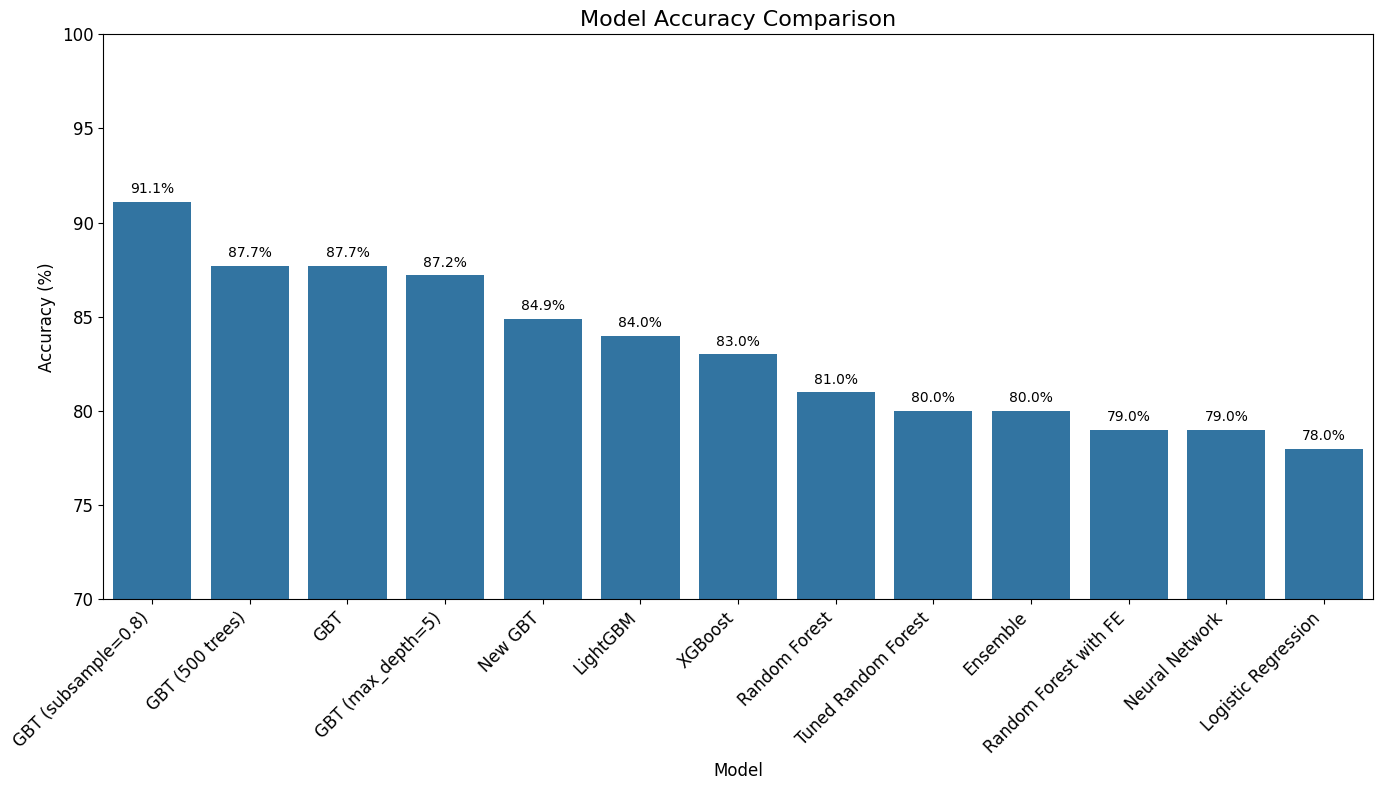

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary of the model accuracies
model_accuracies = {
    'Logistic Regression': 0.78 * 100,
    'Random Forest': 0.81 * 100,
    'Tuned Random Forest': 0.80 * 100,
    'Random Forest with FE': 0.79 * 100,
    'XGBoost': 0.83 * 100,
    'LightGBM': 0.84 * 100,
    'Neural Network': 0.79 * 100,
    'GBT': 0.877 * 100,
    'GBT (500 trees)': 0.877 * 100,
    'GBT (max_depth=5)': 0.872 * 100,
    'GBT (subsample=0.8)': 0.911 * 100,
    'Ensemble': 0.80 * 100,
    'New GBT': 0.849 * 100
}

# Convert the dictionary to a pandas DataFrame and sort by accuracy
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Create a bar plot of the model accuracies
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df)

# Add the accuracy values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(70, 100)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.tight_layout()
plt.show()

In [60]:
# Create and train the best model on the full training data
best_gbt_model = tfdf.keras.GradientBoostedTreesModel(subsample=0.8)
best_gbt_model.compile(metrics=["accuracy"])
best_gbt_model.fit(train_ds_no_id)

# Make predictions on the test data
predictions_final = best_gbt_model.predict(test_ds_no_id)

# Convert predictions to binary format (0 or 1)
binary_predictions_final = (predictions_final > 0.5).astype(int)

# Create a submission DataFrame
submission_final = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": binary_predictions_final.flatten()
})

# Save the submission file
submission_final.to_csv('submission_final.csv', index=False)

print("Final submission file created successfully!")
display(submission_final.head())

Use /tmp/tmp1_kel_5_ as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.493680. Found 891 examples.
Training model...
Model trained in 0:00:00.252009
Compiling model...
Model compiled.
1/1 [==============================] - 0s 139ms/step
Final submission file created successfully!


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
